In [2]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### jointplot
- 여러 종류의 플롯 결합
- 단일 관계, 두 변수간의 분포 
- focuses on a single relationship 
- distribution between two variables along with each variable’s marginal distribution


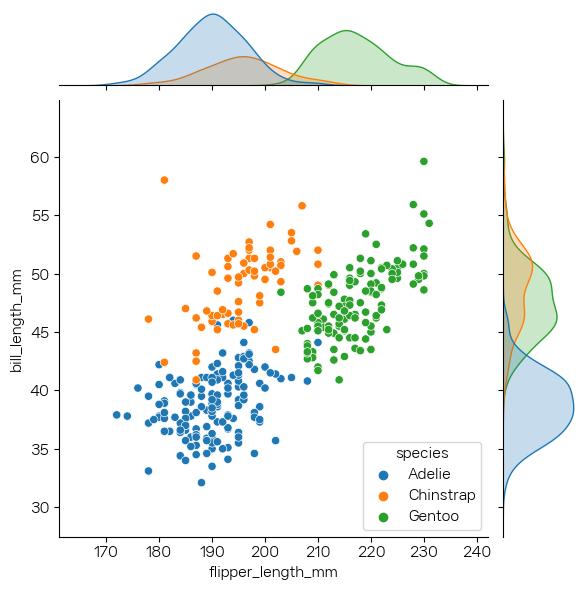

In [17]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

### pairplot
- 현재 그래프에서는 모든 변수들 간 관계 표현(여기서는 float64 타입 형태 변수들간 관계)
- it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively

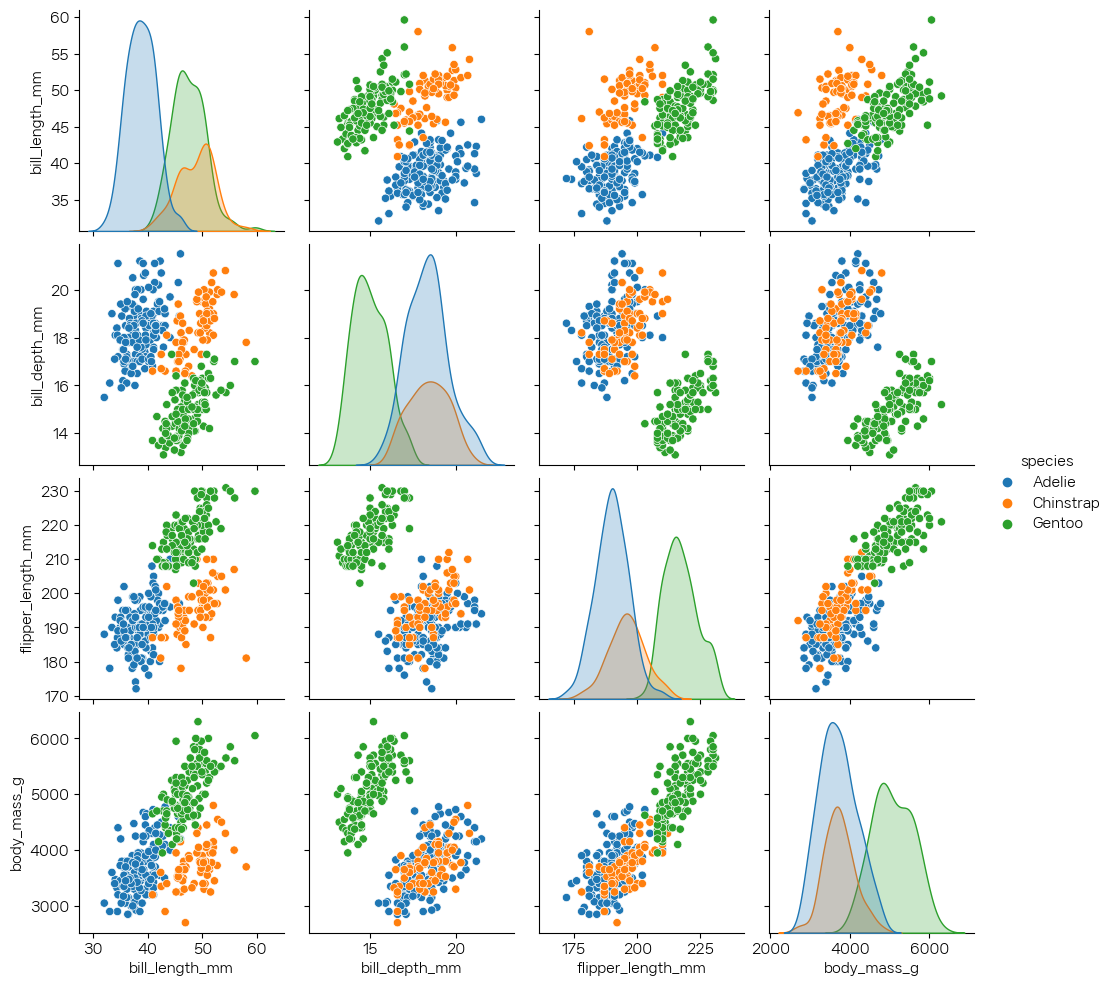

In [20]:
sns.pairplot(data=penguins, hue="species");

# Lower-level tools for building figures

### PairGrid
- 데이터셋의 모든 변수들 간의 관계를 한번에 보는 pairplot과 비슷하지만,
- 더 나아가 각 그래프의 형식을 지정할 수 있다.

- corner=True : 대각선 기준으로 중복 그래프 지우기
- g.map_diag(sns.histplot): pairgrid의 대각선을 seaborn의 히스토그램으로 설정
- element="step": 안쪽 경계선 지우고, 색 연해짐
- linewidth=0: 겉 경계선 없어짐
- kde=True: 막대 그래프 따라서 등곡선
- g.map_lower(sns.kdeplot): 대각선 아래는 kdeplot으로 설정
- hue=None: 한 종류로 구분
- levels=5: 5단계로 영역 나누기
- color=".2": 선 색깔 진함 정도

- 참고 문헌: https://blog.naver.com/bomutravel/222882726340

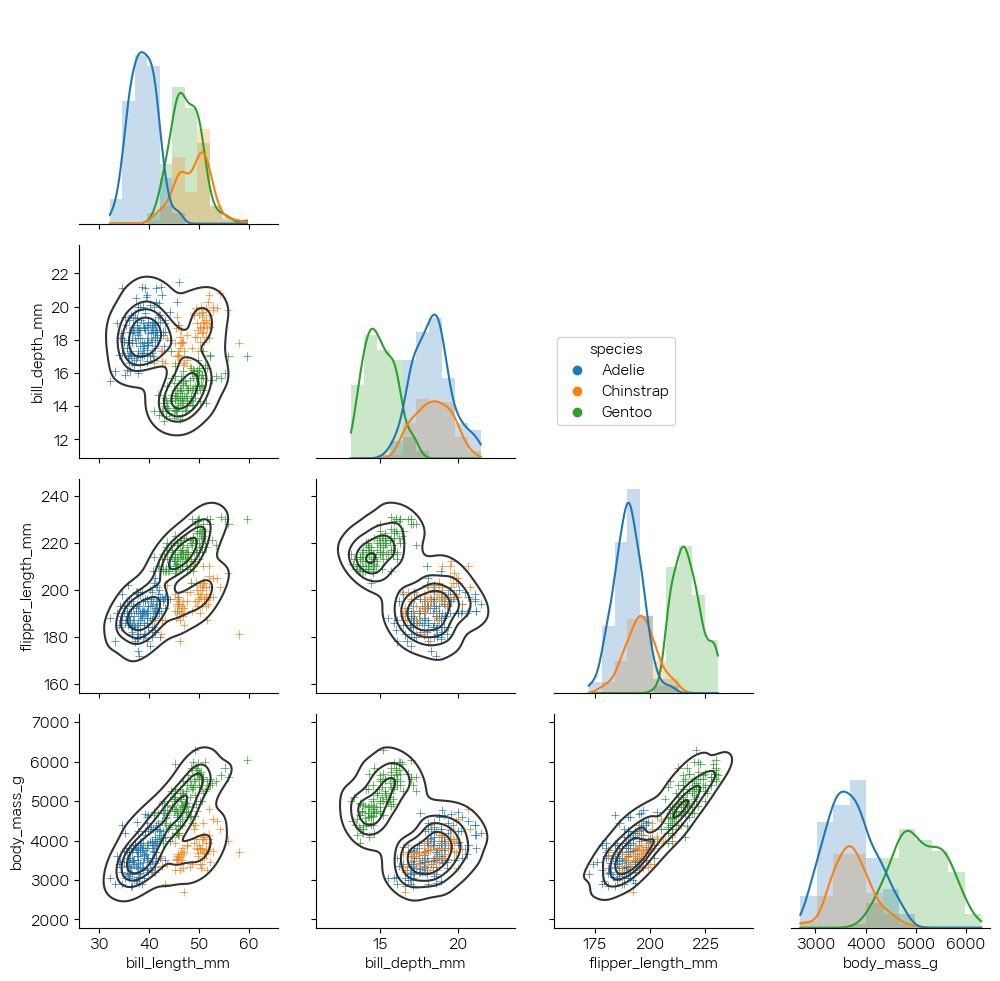

In [39]:
g = sns.PairGrid(penguins, hue="species", corner=True) 
g.map_lower(sns.kdeplot,hue=None, levels=5, color=".2") # 검정 곡선 그래프
g.map_lower(sns.scatterplot, marker="+") # + 점 그래프
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True) # 히스토그램, 등곡선 그래프
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6)) # legend 박스 위치 조정